## House Price Prediction
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. The goal is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

### Business Goal 

The goal is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the training data
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA
#### Identify the null values and see if we can resolve them

In [3]:
#Find columns with null values
null_cols = train.columns[train.isna().any()].tolist()
null_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [4]:
train[null_cols].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# For some features like Alley, we know that NA means No Alley Access. Let us set that instead.
# Alley NA to be replace with 'NAA'(no alley access)
train.Alley.fillna('NAA', inplace=True)
# PoolQC - NA means No Pool
train.PoolQC.fillna('NP', inplace=True)
# Fence - NA means no fence
train.Fence.fillna('NF', inplace=True)
# MiscFeature Na means None
train.MiscFeature.fillna('None', inplace=True)
# FireplaceQu - NA means No fireplace
train.FireplaceQu.fillna('NF', inplace=True)

# Check for remaining nulls
train[null_cols].isna().sum()

LotFrontage     259
Alley             0
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu       0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
PoolQC            0
Fence             0
MiscFeature       0
dtype: int64

In [6]:

# GarageType, GarageYrBlt GarageFinish  GarageQual   GarageCond 
train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NoGarage')
#Find columns with null values
null_cols = train.columns[train.isna().any()].tolist()
null_cols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageYrBlt']

In [7]:
train[null_cols].isna().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageYrBlt      81
dtype: int64

In [8]:
# BsmtQual BsmtExposure      BsmtCond           BsmtFinType1        BsmtFinType2      
train[['BsmtQual', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2']] = train[['BsmtQual', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2']].fillna('NoBasement')
#Find columns with null values
null_cols = train.columns[train.isna().any()].tolist()
train[null_cols].isna().sum()

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [9]:
# for GarageYrBlt if there is a Na values, let us set it as the year house was built
train.GarageYrBlt.fillna(train.YearBuilt, inplace=True)
# For MasVnrType set the value as None if it is NA. MasVnrArea is 0 when Masonry is None
train.MasVnrType.fillna('None', inplace=True)
train.MasVnrArea.fillna(0, inplace=True)
#Find columns with null values
null_cols = train.columns[train.isna().any()].tolist()
train[null_cols].isna().sum()

LotFrontage    259
Electrical       1
dtype: int64

In [10]:
# There is one house which does not have Electrical value provided.
# But if you see all other houses in Timberland (Timber), the electrical is SBrkr.
# Hence we can safely assume that this house also has SBrkr
train.Electrical.fillna('SBrkr', inplace=True)

In [11]:
# For LotFrontage, based on the analysis of the column in excel
# noticed that the LotFrontage is somewhat proprotionate for a given Neighbourhood.
# Let us set the median based on the Neighbourhood
def get_median(neigh):
    return train[train.Neighborhood == neigh].LotFrontage.median()

train['LotFrontage'] = train.apply(lambda row: get_median(row['Neighborhood']) if pd.isna(row['LotFrontage']) else row['LotFrontage'], axis=1)
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NAA,Reg,Lvl,AllPub,...,0,NP,NF,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NAA,Reg,Lvl,AllPub,...,0,NP,NF,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NAA,IR1,Lvl,AllPub,...,0,NP,NF,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NAA,IR1,Lvl,AllPub,...,0,NP,NF,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NAA,IR1,Lvl,AllPub,...,0,NP,NF,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NAA,IR1,Lvl,AllPub,...,0,NP,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NAA,Reg,Lvl,AllPub,...,0,NP,NF,None,0,8,2007,WD,Normal,307000
7,8,60,RL,80.0,10382,Pave,NAA,IR1,Lvl,AllPub,...,0,NP,NF,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NAA,Reg,Lvl,AllPub,...,0,NP,NF,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NAA,Reg,Lvl,AllPub,...,0,NP,NF,None,0,1,2008,WD,Normal,118000


In [12]:
#Find columns with null values - Should be none
null_cols = train.columns[train.isna().any()].tolist()
train[null_cols].isna().sum()

Series([], dtype: float64)

Data cleanup is complete. There are no special date or combined columns. Hence we should be able to stop with EDA here. A quick check on column dtypes will help

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# CentralAir is the only binary feature with Yes/No values
train['CentralAir'] = train.CentralAir.map({'Y':1, 'N':0})
train.info()
train.Neighborhood

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

<AxesSubplot:>

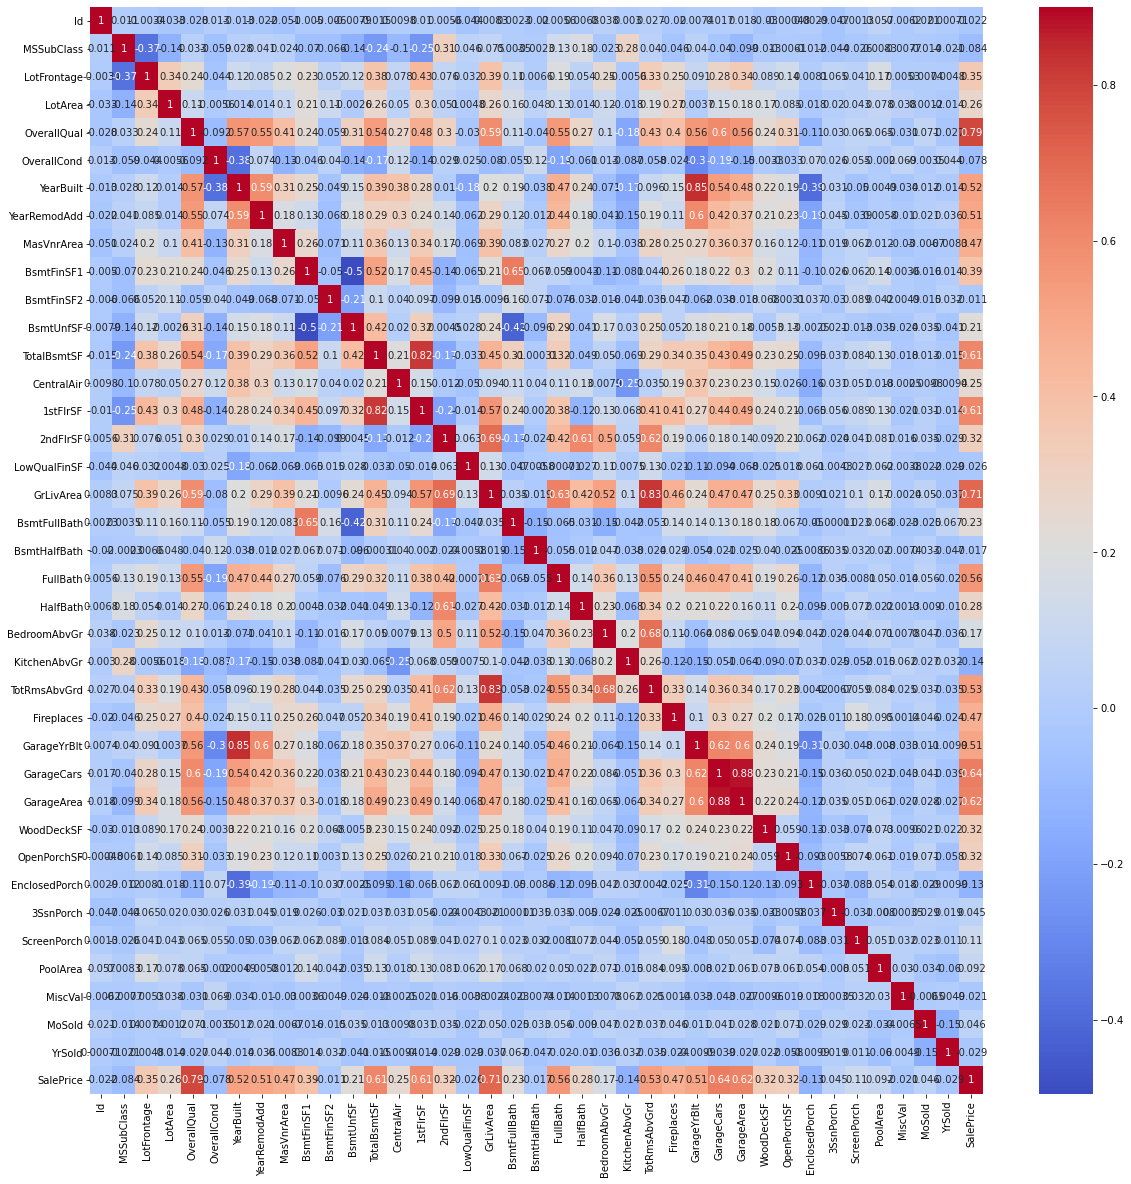

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = train.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, cmap="coolwarm")

In [16]:
#Sort in ascending order for SalePrice
corr_matrix = train.corr()
corr_map = abs(corr_matrix["SalePrice"]).sort_values(axis=0, ascending=True)
corr_map

BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
3SsnPorch        0.044584
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
PoolArea         0.092404
ScreenPorch      0.111447
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
CentralAir       0.251328
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.349876
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
GarageYrBlt      0.508043
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice   

In [17]:
# Remove all features which have less than 0.2 abs correlation
# BsmtFinSF2 BsmtHalfBath     MiscVal  LowQualFinSF  YrSold  3SsnPorch 
# MoSold 'OverallCond', 'MSSubClass' EnclosedPorch   KitchenAbvGr
train.drop(['BsmtFinSF2','BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold',
            '3SsnPorch', 'MoSold', 'OverallCond', 'MSSubClass',
            'EnclosedPorch', 'KitchenAbvGr','BedroomAbvGr'], inplace=True, axis=1)

<AxesSubplot:>

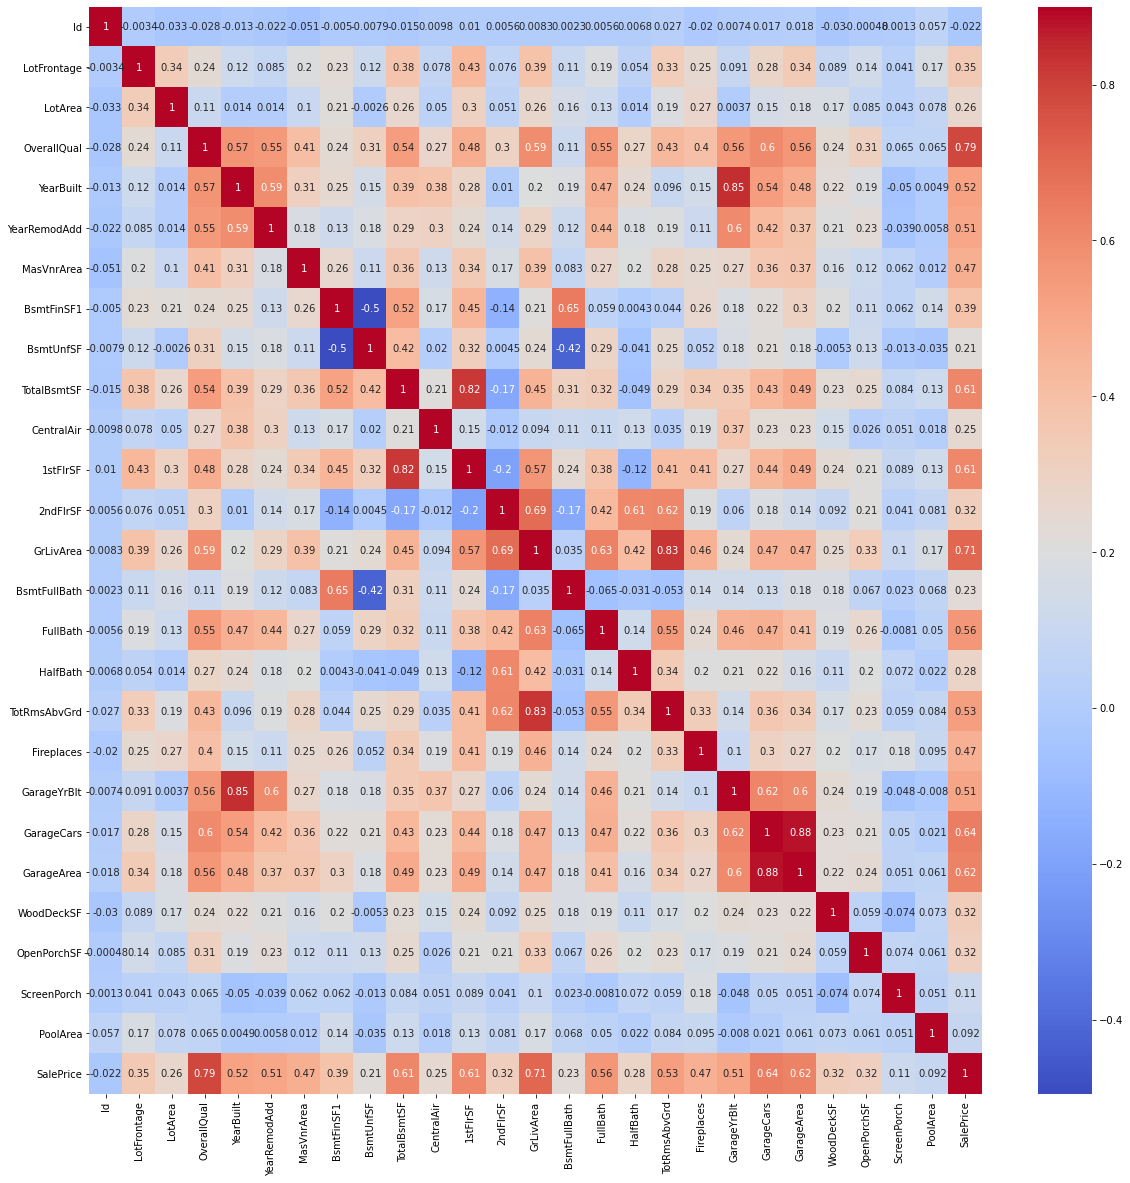

In [18]:
corr_matrix = train.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, cmap="coolwarm")

In [19]:
# GarageCars and GarageArea are corr with each other, hence let us drop GarageArea
train.drop(['GarageArea'], inplace=True, axis=1)
#YearBuilt and GarageYrBlt are corr with each other, hence let us drop GarageYrBlt
train.drop(['GarageYrBlt'], inplace=True, axis=1)

In [20]:
#GrLivArea and TotRmsAbvGrd are corr with each other, hence let us drop TotRmsAbvGrd
train.drop(['TotRmsAbvGrd'], inplace=True, axis=1)

In [21]:
#BsmtFinSF1 and BsmtFullBath are corr with each other, hence let us drop BsmtFullBath
train.drop(['BsmtFullBath'], inplace=True, axis=1)

In [22]:
#TotalBsmtSF and 1stFlrSF are corr with each other, hence let us drop 1stFlrSF
train.drop(['1stFlrSF'], inplace=True, axis=1)

<AxesSubplot:>

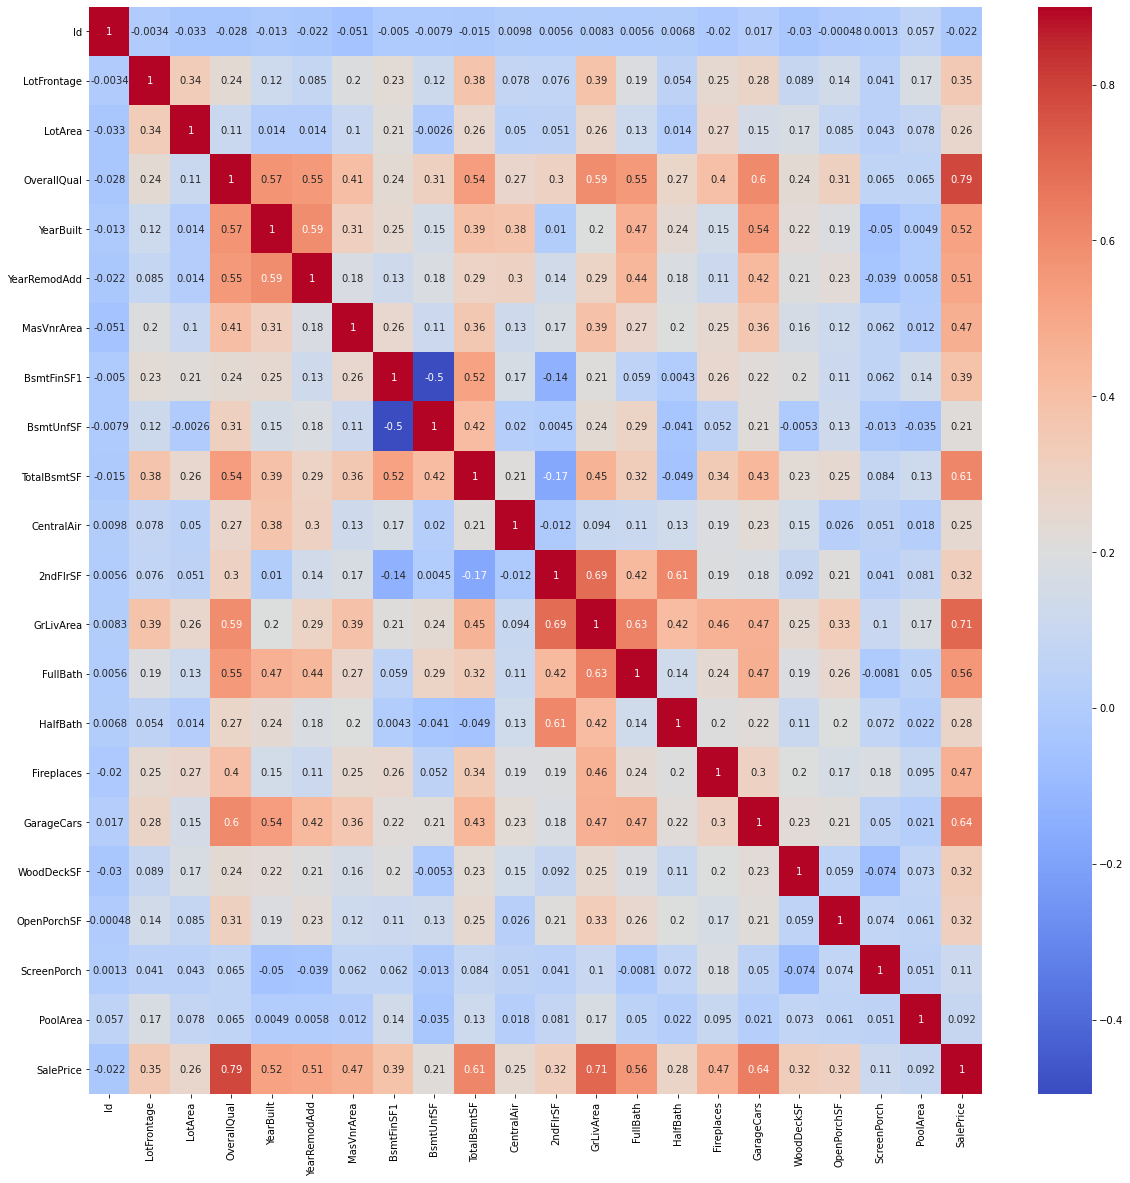

In [23]:
corr_matrix = train.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, cmap="coolwarm")

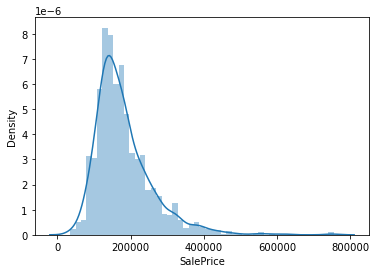

In [24]:
# Let us have a look at the SalePrice distplot
sns.distplot(train['SalePrice'])
plt.show()

<Figure size 864x864 with 0 Axes>

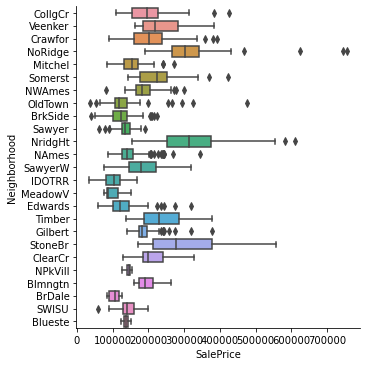

In [25]:
plt.figure(figsize=(12,12))
#sns.catplot(x="Neighborhood", y="SalePrice", data=train)
sns.catplot(data=train,x="SalePrice", y="Neighborhood", orient="h", kind="box")
plt.show()

### Predictor variables
The heatmap shows the correlation of sale-price with independent variables:

SalePrice is highly correlated with OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd.
The Neighborhood also influences the SalePrice with Northridge, Northridge Heights and Stone Brook attracting higher prices. While 'Iowa DOT and Rail Road' and Meadow Village are among those that bring in lower price.

These variables represent the quality, size, age and locality of the house.

In [26]:
#Let us create dummy variables for categorical variables
cat_columns = train.select_dtypes([object])
obj_columns = list(cat_columns.columns)
train_dummies = pd.get_dummies(data=cat_columns, prefix_sep='_', prefix=obj_columns, drop_first=True)
train_dummies.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NAA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
# Concat the dummies with the main DF and then drop the redundant categorical variables
train_new = pd.concat([train, train_dummies], axis=1)
train_new.drop(columns=obj_columns, axis=1, inplace=True)
train_new.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,2003,2003,196.0,706,150,856,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,1976,1976,0.0,978,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,2001,2002,162.0,486,434,920,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,1915,1970,0.0,216,540,756,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,2000,2000,350.0,655,490,1145,...,0,0,0,0,1,0,0,0,1,0


## Linear regression to predict the sale price

### Split the data into train and test (70/30)

In [28]:
# Import required sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
#Split data into train and test - 70/30
df_train, df_test = train_test_split(train_new, train_size=0.7, test_size=0.3, random_state=10)
df_train.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
912,913,51.0,6120,5,1925,1950,0.0,489,279,768,...,0,0,0,0,1,0,0,0,0,0
373,374,79.0,10634,5,1953,1953,0.0,428,0,608,...,0,0,0,0,1,0,0,0,1,0
20,21,101.0,14215,8,2005,2006,380.0,0,1158,1158,...,0,0,1,0,0,0,0,0,0,1
800,801,79.0,12798,6,1997,1997,0.0,462,154,616,...,0,0,0,0,1,0,0,0,1,0
152,153,80.0,14803,6,1971,1971,252.0,416,409,825,...,0,0,0,0,1,0,0,0,1,0


### Rescaling the values using MinMax scaler

In [30]:
# Get the numeric columns to scale
numeric_cols = list(train.select_dtypes(['int64', 'float64']).columns)
numeric_cols.remove('CentralAir')
numeric_cols.remove('Id')
numeric_cols.remove('SalePrice')


# Prepare train and test + seperate the independent variable
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

# Let us also scale the training set
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
print(X_train.head())

      Id  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
912  913     0.102740  0.022529     0.285714   0.384058      0.000000   
373  374     0.198630  0.043628     0.285714   0.586957      0.050000   
20    21     0.273973  0.060366     0.714286   0.963768      0.933333   
800  801     0.198630  0.053743     0.428571   0.905797      0.783333   
152  153     0.202055  0.063114     0.428571   0.717391      0.350000   

     MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
912      0.0000    0.086641   0.119435     0.125696  ...               0   
373      0.0000    0.075833   0.000000     0.099509  ...               0   
20       0.2375    0.000000   0.495719     0.189525  ...               0   
800      0.0000    0.081857   0.065925     0.100818  ...               0   
152      0.1575    0.073707   0.175086     0.135025  ...               0   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
912               0             0       

### Let us build a model now

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Fit the model using training data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the independent variable for training set and calculate the r2 score.
y_train_pred = lm.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
r2

0.9316749048798703

We are able to explain 93% of the data using this model. Let us see the RMSE for this model.

In [34]:
r2 = r2_score(y_train, y_train_pred)
r2
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

dictio = {"Type":["Train"],"R2":[r2],"RSS":[rss],"MSE":[mse],"RMSE":[rmse]}
reg_metrics = pd.DataFrame(dictio)
reg_metrics.head()

452832009338.0708
443518128.6367001
21059.870100185806


,Type,R2,RSS,MSE,RMSE
0,Train,0.931675,4.528320e+11,4.435181e+08,21059.8701


In [35]:
# Let us have a quick look at coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-827947.461360097
[ 2.56684489e+00  1.61156354e+04  1.82352158e+05  6.03306522e+04
  2.75384701e+04  1.32853264e+04  3.50968778e+04  3.48644640e+04
 -2.47024583e+04  1.76150852e+05  9.00473206e+02  4.57923436e+04
  2.11402133e+05  2.52295518e+03 -4.03812355e+03  1.21908418e+04
  3.05602176e+04  2.19786794e+04  5.45001604e+03  1.57941218e+04
  3.58471217e+05  4.72515171e+04  4.22196280e+04  3.88296461e+04
  3.70148733e+04  6.22109174e+04 -5.44812755e+02  2.32620907e+03
  5.84022840e+03 -7.73103414e+03 -1.96399019e+02  8.03180707e+03
 -5.26635427e+03  7.59714024e+03 -4.27161547e+04  8.78600588e+03
 -1.14896278e+04  8.26439874e+02 -2.33010584e+03  1.35548146e+04
 -4.97989067e+04 -1.93210498e+03 -1.29645732e+04 -9.18072797e+03
 -2.71476274e+04 -1.58851829e+04  7.06247438e+03 -2.94653108e+04
 -1.68210083e+04 -1.74073226e+04 -1.85381153e+04 -2.89967873e+04
 -2.32930758e+04  1.03702465e+04 -2.14926945e+04  2.95952794e+04
  1.18746166e+04 -2.19021403e+04 -2.04061870e+04 -2.07612101e+04
 -1.064

In [36]:
# Let us predict for test data now
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
y_test_pred = lm.predict(X_test)

In [37]:
# Capture the metrics for Linear regression
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9316749048798703
0.45724303170837244
452832009338.0708
1392708235772.5708
443518128.6367001
3179699168.4305267


#### Conclusion from linear regression
There is clearly overfitting and we need regularization. Let us try Ridge and Lasso

### Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = alpha_params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [40]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 9.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)

118819.37924126309
[-3.79939361e-01  3.38696761e+03  1.90429049e+04  5.78915288e+04
 -4.34901181e+02  1.20759901e+04  2.15481667e+04  1.34085371e+04
  1.18070607e+04  1.88005237e+04  8.19963397e+03  4.55089509e+04
  5.33861322e+04  3.32423461e+04  8.31839167e+03  1.60221267e+04
  4.02669786e+04  2.05182027e+04  1.01154746e+04  9.95664128e+03
  1.01163449e+04  5.68059599e+03  6.61012101e+03  7.78547428e+03
  1.98474077e+02  6.28937520e+03  3.84350936e+02  2.22076095e+03
  1.11841398e+04 -1.00236448e+04 -2.15973403e+03  1.06982355e+04
  7.00784370e+03  1.14030992e+04 -3.89332553e+03  1.10889126e+04
 -1.11824107e+04 -1.95817647e+03 -3.24684617e+03  1.28058131e+04
  8.95247966e+02 -2.23091589e+03 -1.33300235e+03  5.24505239e+02
 -2.47534783e+03 -9.38953355e+03  1.71178339e+04 -1.80078704e+04
 -1.43889748e+04 -1.07092175e+04 -8.01428659e+03 -1.34361186e+04
 -9.32317059e+03  2.25206431e+02 -8.27107010e+03  4.78585296e+04
  2.35047144e+04 -8.06276193e+03 -3.62146091e+03 -8.35584993e+03
 -1.83

In [41]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for Ridge
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 of train data:" , r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 of test data:" , r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS of train data:" , rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS of test data:" , rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE of train data:" , mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE of test data:" , mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 of train data: 0.877717813777171
R2 of test data: 0.8702832472384661
RSS of train data: 810438507201.1696
RSS of test data: 332851718988.14575
MSE of train data: 793769350.8336626
MSE of test data: 759935431.4797848


In [42]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = alpha_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 20}


In [43]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [44]:
lasso.coef_

array([ 8.37838166e-01, -0.00000000e+00,  4.39364999e+04,  8.17822155e+04,
        1.77885477e+03,  1.30051197e+04,  1.56415183e+04,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  7.04050338e+03,  3.14749839e+04,
        1.92455319e+05,  1.51475216e+04,  0.00000000e+00,  3.93504483e+03,
        4.36325462e+04,  2.18726495e+04,  3.29980346e+03,  7.78067441e+03,
        2.72905277e+04,  2.89967878e+03,  0.00000000e+00,  2.27236454e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        8.33613911e+03, -1.00466664e+04, -7.85916987e+02,  8.96121038e+03,
        2.09868167e+03,  1.22779594e+04, -0.00000000e+00,  1.34807827e+04,
       -6.08898226e+03, -0.00000000e+00, -2.45641373e+02,  1.13457311e+04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  5.48328677e+03,
        0.00000000e+00,  0.00000000e+00,  2.19567287e+04, -9.15560311e+03,
       -0.00000000e+00, -3.79550180e+03, -0.00000000e+00, -3.83231948e+03,
       -2.39262832e+03,  

In [45]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8927037985177415
0.8799333808556737
711117261178.0088
308089585381.10254
696490951.202751
703400879.865531


In [46]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.316749e-01,8.777178e-01,8.927038e-01
1,R2 Score (Test),4.572430e-01,8.702832e-01,8.799334e-01
2,RSS (Train),4.528320e+11,8.104385e+11,7.111173e+11
3,RSS (Test),1.392708e+12,3.328517e+11,3.080896e+11
4,RMSE (Train),2.105987e+04,2.817391e+04,2.639112e+04
5,RMSE (Test),5.638882e+04,2.756693e+04,2.652171e+04


## Conclusion

#### Model Selection
It is clear that regularisation has helped us build a better model. Lasso seem to produce the best prediction, while Ridge is not far behind.

#### Variables
SalePrice is highly correlated with OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd. The Neighborhood also influences the SalePrice with Northridge, Northridge Heights and Stone Brook attracting higher prices. While 'Iowa DOT and Rail Road' and Meadow Village are among those that bring in lower price.